<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Proving_the_Slow_Down_Friction_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

User Logs Generated.
Group
Baseline    300.205140
With_AI     391.432175
Name: Time_Seconds, dtype: float64


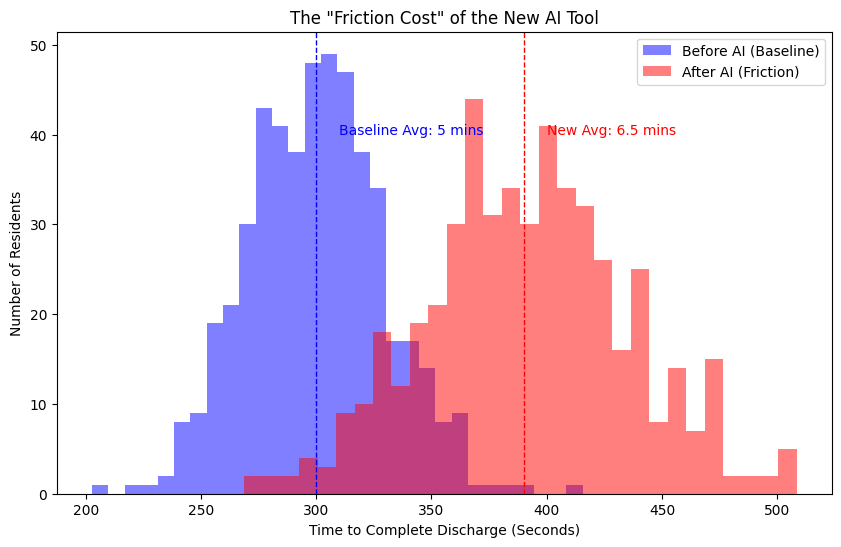

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup the Scenario
# 500 workflows BEFORE AI (Baseline)
# 500 workflows AFTER AI (With the "Smart Tool")

np.random.seed(42)

# Baseline: Residents take ~5 minutes (300 seconds) to discharge, with some variance.
baseline_times = np.random.normal(loc=300, scale=30, size=500)

# After AI: The Vendor says it adds 5 seconds.
# BUT: It introduces a "Screen Switch" (adds 20s) and a "Login" (adds 40s).
# Plus, cognitive re-orientation takes time.
# Realistically, it adds ~90 seconds of friction.
ai_times = np.random.normal(loc=390, scale=45, size=500)

# Create DataFrame
df = pd.DataFrame({
    'Workflow_ID': range(1, 1001),
    'Group': ['Baseline']*500 + ['With_AI']*500,
    'Time_Seconds': np.concatenate([baseline_times, ai_times])
})

print("User Logs Generated.")
print(df.groupby('Group')['Time_Seconds'].mean())

# 2. Visualize the Friction
plt.figure(figsize=(10, 6))
plt.hist(df[df['Group']=='Baseline']['Time_Seconds'], alpha=0.5, label='Before AI (Baseline)', color='blue', bins=30)
plt.hist(df[df['Group']=='With_AI']['Time_Seconds'], alpha=0.5, label='After AI (Friction)', color='red', bins=30)

plt.xlabel('Time to Complete Discharge (Seconds)')
plt.ylabel('Number of Residents')
plt.title('The "Friction Cost" of the New AI Tool')
plt.legend()
plt.axvline(x=300, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=390, color='red', linestyle='dashed', linewidth=1)

# Add text annotation
plt.text(310, 40, 'Baseline Avg: 5 mins', color='blue')
plt.text(400, 40, 'New Avg: 6.5 mins', color='red')

plt.show()